In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
# Carreguem el dataset
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
nf, ncol = df.shape
contador = 0
dic = {}
columnes = list(df.columns)
for col in range(ncol):
    contador = 0
    for fila in range(nf):  # recorre todas las filas
        if pd.isnull(df.iloc[fila, col]):  # columna 5 → índice 5 (sexta columna)
            contador += 1
        dic[columnes[col]] = contador

print('Columnes Amb NaNs')
for i in dic:
    if dic[i] != 0:
        print( i,':', dic[i])


Columnes Amb NaNs
Age : 177
Cabin : 687
Embarked : 2


In [ ]:
nf, ncol = df.shape
contador = 0
col = 2

number_by_surv = df["Survived"].mean()

print(number_by_surv)

print('------------------------------------')

import matplotlib.pyplot as plt
import seaborn as sns

survival_by_sex = df.groupby("Cabin")["Survived"].mean()
survival_by_embarked = df.groupby("Embarked")["Survived"].mean()
survival_by_class = df.groupby("Pclass")["Survived"].mean()

number_by_sex = df["Sex"].value_counts().sort_index()
number_by_embarked = df["Embarked"].value_counts().sort_index()
number_by_class = df["Pclass"].value_counts().sort_index()

nombre_homes = (df["Sex"] == 'male').sum()
nombre_dones = (df["Sex"] == 'female').sum()

print(number_by_embarked)

Pclass
Cantidad de valores nulos en la columna 5: 0
------------------------------------
Embarked
C    168
Q     77
S    644
Name: count, dtype: int64


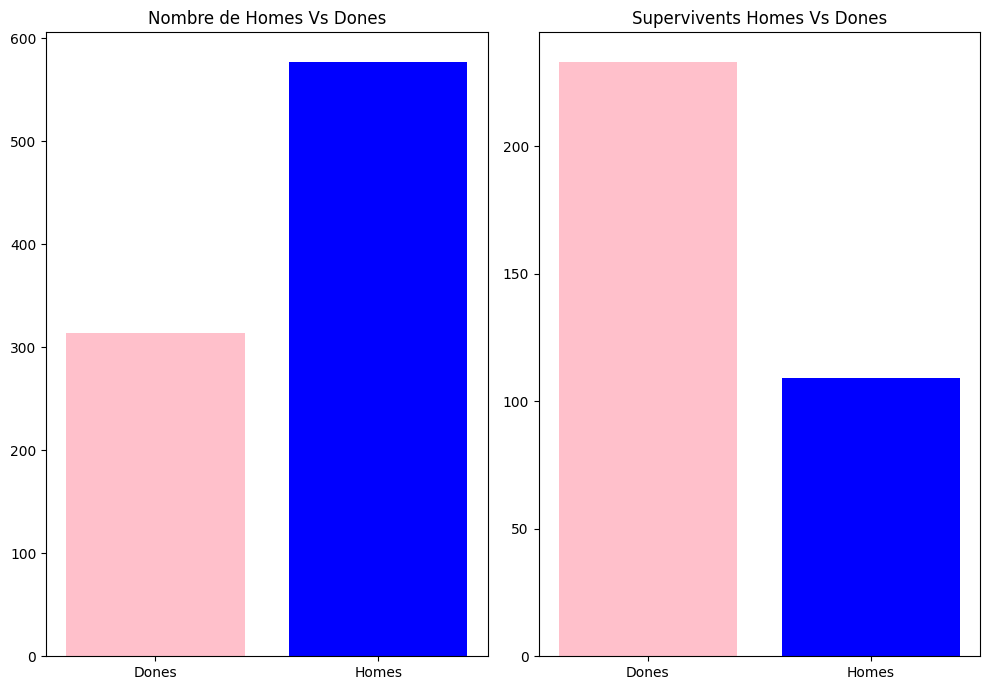

In [108]:
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.bar(['Dones','Homes'],[nombre_dones, nombre_homes], color = ['pink', 'blue'])
plt.title('Nombre de Homes Vs Dones')

plt.subplot(1,2,2)
plt.bar(['Dones', 'Homes'], df.groupby("Sex")["Survived"].sum(), color = ['pink', 'blue'])
plt.title('Supervivents Homes Vs Dones')

plt.tight_layout()
plt.show()

In [ ]:
df["Cabin"] = df["Cabin"].fillna('NOCab')
df['Cabin'] = df['Cabin'].replace('^(?!NOCab).*$', 'ConCabina', regex=True)
survival_by_Cabin = df.groupby("Cabin")["Survived"].sum()
print(survival_by_Cabin)

KeyError: 'Cabin_Group'